<h1> Imports

In [173]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import re 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

import seaborn as sns

import numpy as np

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [174]:
kmean = True

In [175]:
data = pd.read_csv('datasets/news-article-categories_v2.csv')
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6872 entries, 0 to 6871
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  6872 non-null   object
 1   title     6872 non-null   object
 2   body      6872 non-null   object
dtypes: object(3)
memory usage: 161.2+ KB


In [177]:
data["content"] = data["title"] + ". " + data["body"]

In [178]:
data.content.iloc[0]

'Modeling Agencies Enabled Sexual Predators For Years, Former Agent Says. In October 2017, Carolyn Kramer received a disturbing phone call. The former modeling agent listened intently as a model she used to represent told her that a famous French photographer, who still shoots for top publications, raped her when she was 16. Shortly after meeting the man at a restaurant in 1983, the model said she blacked out after drinking one glass of champagne, then woke up in his bed the next morning with a sore and bruised vagina. The woman, who preferred to remain anonymous, confirmed this story with HuffPost, but did not want to name the photographer for fear of legal repercussions. “He was one of the photographers that agents and clients and young girls basically knew was lecherous,” Kramer said,\xa0claiming that she and other agents sent their models to him in the ’80s anyway. “[But] what I didn’t realize [at the time] is that he was raping girls.”\xa0 Kramer said she broke down crying after t

In [179]:
docs = data["content"].to_list()
docs[0]

'Modeling Agencies Enabled Sexual Predators For Years, Former Agent Says. In October 2017, Carolyn Kramer received a disturbing phone call. The former modeling agent listened intently as a model she used to represent told her that a famous French photographer, who still shoots for top publications, raped her when she was 16. Shortly after meeting the man at a restaurant in 1983, the model said she blacked out after drinking one glass of champagne, then woke up in his bed the next morning with a sore and bruised vagina. The woman, who preferred to remain anonymous, confirmed this story with HuffPost, but did not want to name the photographer for fear of legal repercussions. “He was one of the photographers that agents and clients and young girls basically knew was lecherous,” Kramer said,\xa0claiming that she and other agents sent their models to him in the ’80s anyway. “[But] what I didn’t realize [at the time] is that he was raping girls.”\xa0 Kramer said she broke down crying after t

In [180]:
len(docs)

6872

<h1> Cleaning up the data

Removed this part as it is not advised to remove stopwords before feeding the docs to BERTopic, as they are used to create word embeddings. I instead did the cleaning inside the model. (cf Cleaning and Clustering Cells)

In [181]:
# ## Remove stopwords
# stopwordSet = set(stopwords.words("english"))

# ## NlP Processing
# lemma = WordNetLemmatizer()

# def cleanup_sentences(sentence):
#     text = re.sub('[^a-zA-Z]'," ", sentence) # Removing non a-z characters
#     text = text.lower() # Lowering all text
#     text = word_tokenize(text, language="english") # Splitting each word into an element of a list
#     text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet] # Lemmatizing words and removing stopwords
#     text = " ".join(text) # Putting words back into a single string. ['the', 'brown', 'cow'] --> 'the brown cow'
#     return text

# ## apply the function to the data 
# data['body_cleaned'] = data['body'].apply(cleanup_sentences)

In [182]:
# docs = data["body_cleaned"].to_list()
# docs[0]

<h1> Cleaning and Clustering

In [183]:
#Removing stopwords
vectorizer_model = CountVectorizer(stop_words="english")

#Removing frequent words
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

Trying out Kmeans clustering as to not produce any outliers (which HBDscan does)

In [184]:
N_topics = 30

if kmean:
    #Kmeans clustering
    cluster_model = KMeans(n_clusters=N_topics)
    model = BERTopic(hdbscan_model=cluster_model, language="english", calculate_probabilities=False, vectorizer_model=vectorizer_model, ctfidf_model=ctfidf_model)
else:
    #HBDScan clustering
    model = BERTopic(language="english", calculate_probabilities=False, vectorizer_model=vectorizer_model, ctfidf_model=ctfidf_model)

<h1> Training

In [185]:
## Running this cell takes about 
#   - 7 minutes for 30 topics
#   - 11 for 14 topics
topics = model.fit_transform(docs)

In [186]:
model.get_topic_info()

,Topic,Count,Name
0,0,462,0_film_movie_season_infinity
1,1,392,1_trump_donald_colbert_meyers
2,2,369,2_art_artists_artist_museum
3,3,323,3_climate_energy_water_oo
4,4,306,4_muslim_muslims_jewish_white
5,5,290,5_women_men_womens_gender
6,6,281,6_police_cosby_officers_authorities
7,7,276,7_music_musical_theatre_broadway
8,8,263,8_apple_iphone_phone_security
9,9,262,9_church_jesus_religious_god


In [187]:
model.visualize_barchart(top_n_topics=8)

In [188]:
model.generate_topic_labels()

['0_film_movie_season',
 '1_trump_donald_colbert',
 '2_art_artists_artist',
 '3_climate_energy_water',
 '4_muslim_muslims_jewish',
 '5_women_men_womens',
 '6_police_cosby_officers',
 '7_music_musical_theatre',
 '8_apple_iphone_phone',
 '9_church_jesus_religious',
 '10_sexual_weinstein_harassment',
 '11_nfl_players_game',
 '12_trump_giuliani_cohen',
 '13_facebook_users_zuckerberg',
 '14_schools_education_charter',
 '15_immigration_abortion_democratic',
 '16_animal_animals_pet',
 '17_brain_youre_life',
 '18_amazon_trade_jobs',
 '19_students_education_learning',
 '20_news_fox_sinclair',
 '21_book_poetry_books',
 '22_olympics_olympic_games',
 '23_gun_shooting_nra',
 '24_nasa_mars_space',
 '25_species_whales_shark',
 '26_uber_drivers_ubers',
 '27_nassar_gymnastics_usa',
 '28_extreme_weather_photos',
 '29_loans_loan_repayment']

<h1> Topic Reduction

In [189]:
# model.reduce_topics(docs, nr_topics=20)

<h1> Saving Model

In [190]:
model.save("../../my_BERTopic")

c:\Users\julie\anaconda3\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



<h1> Prediction

In [191]:
model = BERTopic.load("../../my_BERTopic")

In [192]:
article_test1 = ["The collapse of Silicon Valley Bank (SVB), the biggest bank failure since 2008, has sparked alarm across the world as governments try to assess its impact on tech start-ups, other financial institutions and even pension funds. On Monday, US president Joe Biden assured Americans the nation\’s banking system was safe, telling them: \“Your deposits will be there when you need them\". US regulators announced steps on Sunday to protect customers and prevent more bank runs after they seized and shut down another struggling lender, crypto-friendly Signature Bank. While SVB was the go-to lender for Silicon Valley venture capitalists and tech firms, including Etsy and Roblox, it also helped fund companies on the other side of the Atlantic, leaving them scrambling to figure out how to access their deposits and manage their finances"]

In [193]:
article_test2 = ["The exhibition brings together around one hundred works, among them never-before-seen paintings and drawings by Monet, Sisley, Pissarro and Renoir, as well as books of colours, fabric swatches, Japanese prints, archive documents and a host of family photographs. The dynamic portrait that Claude Monet painted of his older brother in 1874, a vibrant illustration of the brothers\’ deeply affectionate bond, is also presented for the very first time. Curator Lefebvre spent nearly two years tracking it down. Painted in 1874, the year of Claude\’s first show and Leon\’s debut as an industrialist in Rouen, it depicts a well-off man in a black suit and top hat (see above). According to the family, the portrait was initially painted outdoors with the intention of finishing it at Monet\’s atelier. But visiting Renoir and Sisley advised their friend to leave it as is. Leon Monet didn\’t agree and hid the painting until his death."]

In [194]:
article_test3 = ["Amnesty International released a new report today, entitled “My Eye Exploded”: The global abuse of Kinetic Impact Projectiles, which documents the use of “non-lethal” anti-riot weapons by police across the globe.The report found that the deployment of Kinetic Impact Projectiles (KIPs), a term which encompasses a variety of weapons including plastic and rubber bullets, has led to “thousands of injuries across the world – including permanent disabilities and scores of deaths”.Along with 30 other organisations, Amnesty International called for the creation of a “robust Torture-Free Trade Treaty” to ban the use of “inherently abusive law enforcement equipment”, and to restrict the trade of such weapons, given the “gaps” that exist in current legislation. After spending five years researching the impact of KIPs in over 30 countries, Amnesty International found that thousands of protesters and bystanders have been injured, and dozens killed as a result of authorities using these weapons."]

In [195]:
article_test4 = ["China must openly condemn Russia's invasion of Ukraine as illegal before engaging in any moderation efforts to bring the war to an end, NATO Secretary General Jens Stoltenberg has said. \"It is for Ukraine to decide what are acceptable conditions for any peaceful solution,\" Stoltenberg said on Tuesday. \"China therefore needs to start to understand Ukraine's perspective and to engage with President Zelenskyy directly if it wants to be serious about peace.\" His comments come as Chinese President Xi Jinping meets with Russian President Vladimir Putin in Moscow, a visit closely watched by Western allies who worry China might be preparing to step up its military aid to Russia, whose economy is under heavy international sanctions."]

In [196]:
topic, _ = model.transform(article_test4)

In [197]:
topic

[18]

In [198]:
model.get_topic_info(topic[0])["Name"]

0    18_amazon_trade_jobs_tax
Name: Name, dtype: object

In [199]:
topic = model.transform(article_test1)[0]

model.get_topic_info(topic[0])["Name"]
#Should give something like bank

0    8_apple_iphone_phone_security
Name: Name, dtype: object

In [200]:
topic = model.transform(article_test2)[0]

model.get_topic_info(topic[0])["Name"]
#Should give something like art

0    2_art_artists_artist_museum
Name: Name, dtype: object

In [201]:
topic = model.transform(article_test3)[0]

model.get_topic_info(topic[0])["Name"]

#Should give something like police

0    13_facebook_users_zuckerberg_content
Name: Name, dtype: object

In [210]:
topic = model.transform(article_test4)[0]

topic_name = model.get_topic_info(topic[0])["Name"][0]
#Should give something like war

In [212]:
key_words = topic_name.split('_')

In [214]:
key_words.pop(0)

'18'

In [215]:
key_words

['amazon', 'trade', 'jobs', 'tax']

In [203]:
article_list = [article_test1[0], article_test2[0], article_test3[0], article_test4[0]]

prediction = model.transform(article_list)

In [204]:
prediction

([8, 2, 13, 18], None)

<h1> Heatmap

In [205]:
data_pred = data.copy()

topic_df = pd.DataFrame({'bertopic prediction':topics[0]})

In [206]:
data_pred = data_pred.join(topic_df)

In [207]:
categories = data_pred["category"].unique()
print(categories)

['ARTS & CULTURE' 'BUSINESS' 'COMEDY' 'CRIME' 'EDUCATION' 'ENTERTAINMENT'
 'ENVIRONMENT' 'MEDIA' 'POLITICS' 'RELIGION' 'SCIENCE' 'SPORTS' 'TECH'
 'WOMEN']


In [208]:
count_category_array = np.zeros((len(categories), N_topics))

for i in range(len(categories)):
    for j in range(N_topics):
        count_category_array[i,j] = len(data_pred[(data_pred["category"]== categories[i]) & (data_pred["bertopic prediction"]==j)])


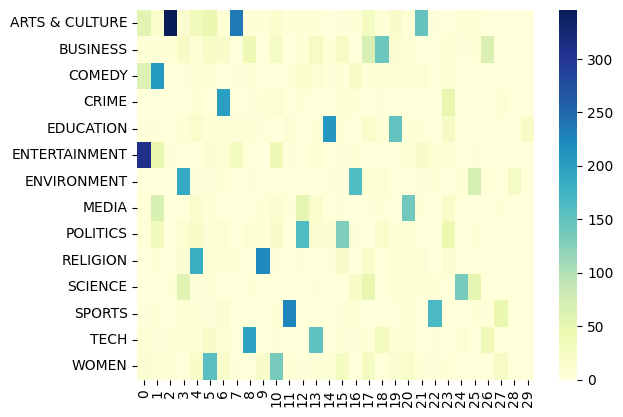

In [209]:
ax = sns.heatmap(count_category_array, cmap='YlGnBu', yticklabels=categories, xticklabels=np.arange(N_topics))